In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("Display.max_columns",None)
pd.set_option('Display.max_rows',None)

In [2]:
# import dataset
data=pd.read_csv(r"C:\Users\Dell\Downloads\archive (1)\iris.data.csv")

In [3]:
data.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [4]:
# check the shape
data.shape

(149, 5)

In [5]:
# check the columns
data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [6]:
# check the duplicates
data.duplicated().sum()

3

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
# change the column name"
data.columns=['sepal_length','sepal_width','petal_length','petal_width','species']

In [10]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [11]:
# check the value for target variable
data.species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        47
Name: species, dtype: int64

In [12]:
data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

__3 different species iris dataset 50 row of petal and sepal dimensions__

# Perform EDA

# Uni-variate analysis

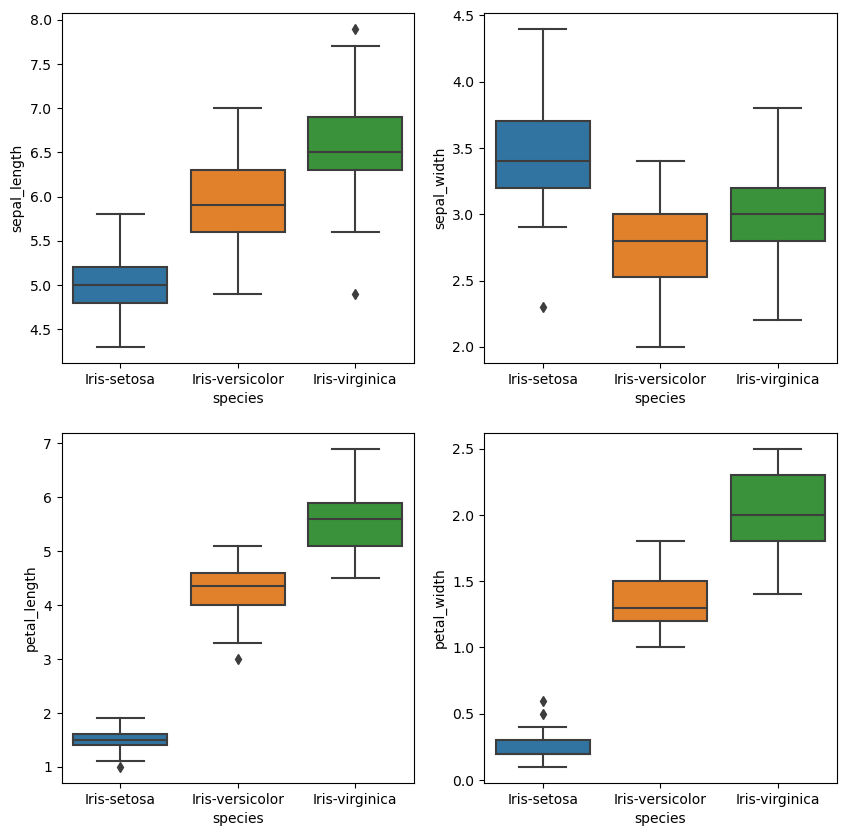

In [13]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(x= data.species,y=data.sepal_length)
plt.subplot(2,2,2)
sns.boxplot(x= data.species,y=data.sepal_width)
plt.subplot(2,2,3)
sns.boxplot(x= data.species,y=data.petal_length)
plt.subplot(2,2,4)
sns.boxplot(x= data.species,y=data.petal_width)
plt.show()

**Iris-virginica has higher median sepal,petal length,petal width while iris setosa has high median sepal and lowest median sepal length,patal length and width**

**Bi-variate analysis**- catagorial- numerical variable

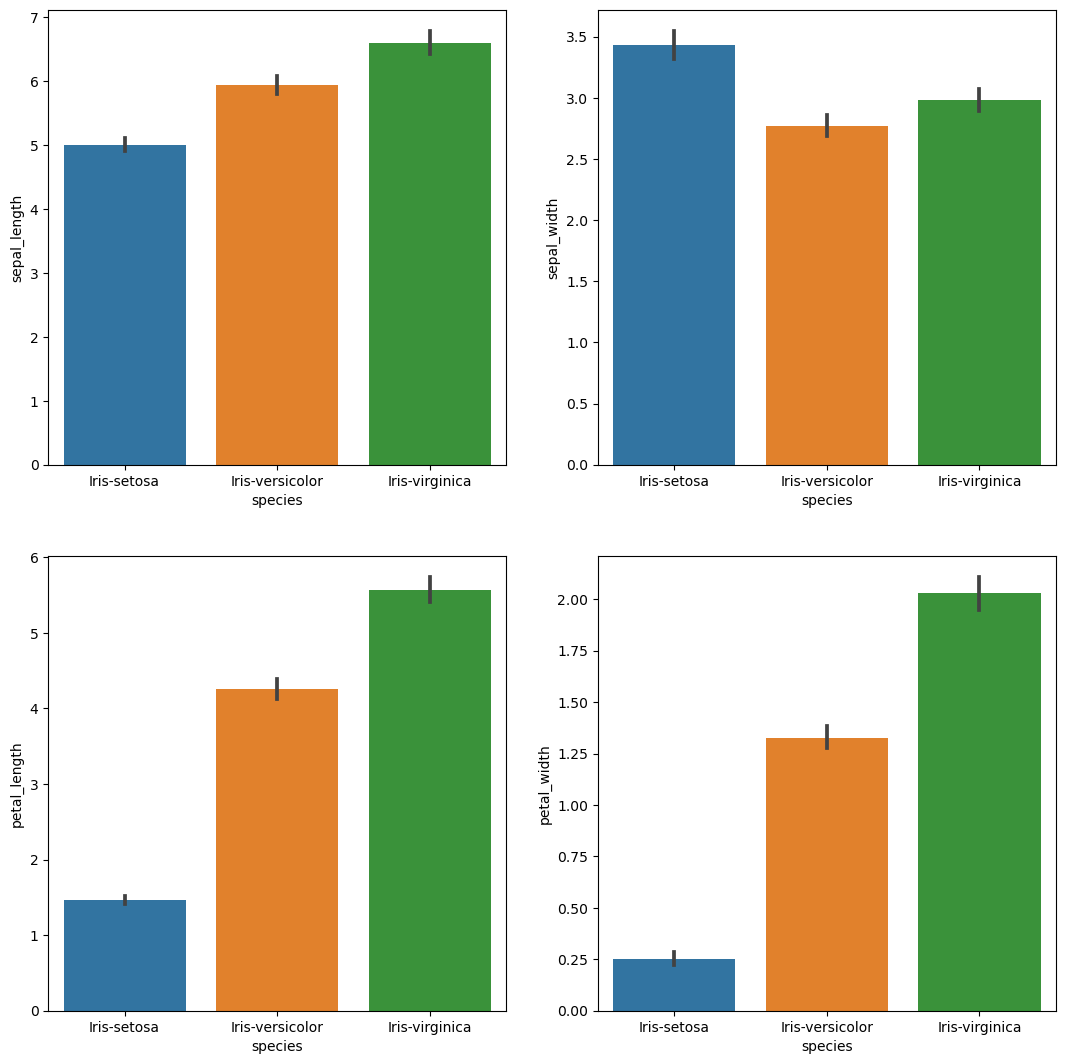

In [14]:
plt.figure(figsize=(13,13))

plt.subplot(2,2,1)
sns.barplot(x=data.species,y=data.sepal_length)
plt.subplot(2,2,2)
sns.barplot(x=data.species,y=data.sepal_width)
plt.subplot(2,2,3)
sns.barplot(x=data.species,y=data.petal_length)
plt.subplot(2,2,4)
sns.barplot(x=data.species,y=data.petal_width)

plt.show()

__Bi-variate Analysis__- Numerical-Numerical variable

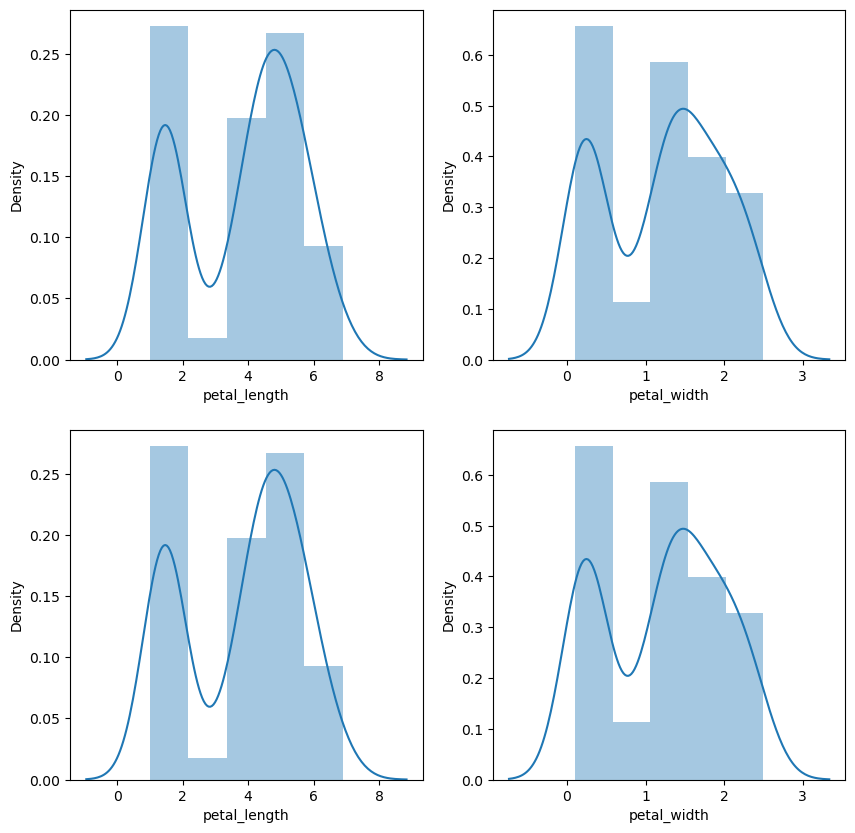

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data['petal_length'])
plt.subplot(2,2,2)
sns.distplot(data['petal_width'])
plt.subplot(2,2,3)
sns.distplot(data['petal_length'])
plt.subplot(2,2,4)
sns.distplot(data['petal_width'])
plt.show()

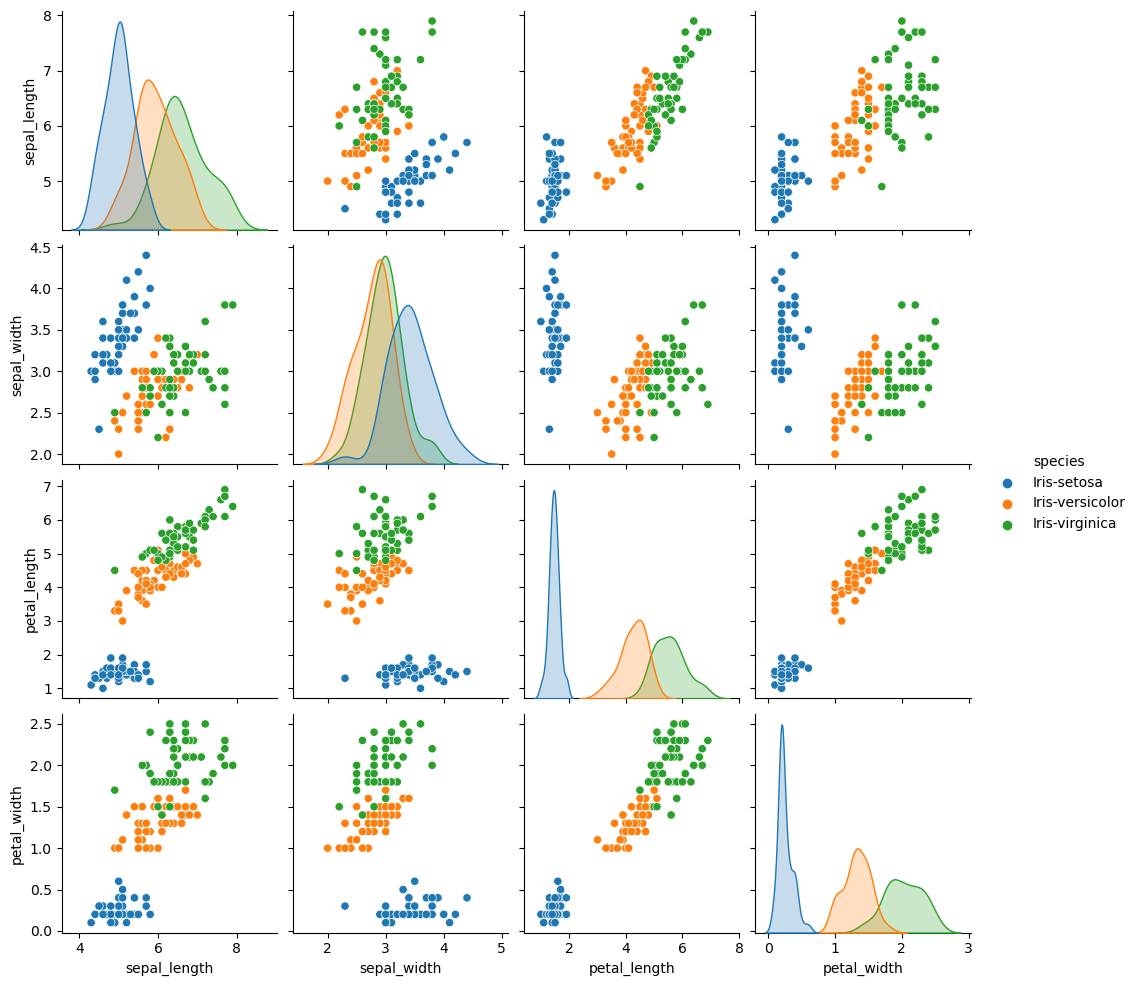

In [16]:
sns.pairplot(data,kind='scatter',hue='species')
plt.show()

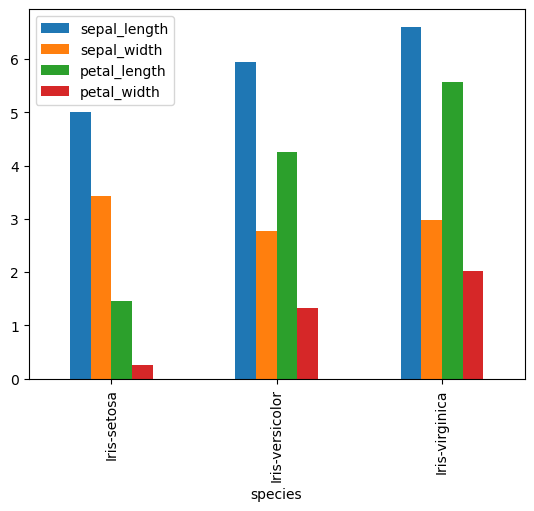

In [17]:
data.groupby('species').mean().plot.bar()
plt.show()

 **Multi-variate analysis**

In [18]:
corr=data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103591,0.870793,0.816015
sepal_width,-0.103591,1.000000,-0.415679,-0.350436
petal_length,0.870793,-0.415679,1.000000,0.961405
petal_width,0.816015,-0.350436,0.961405,1.000000


<AxesSubplot:>

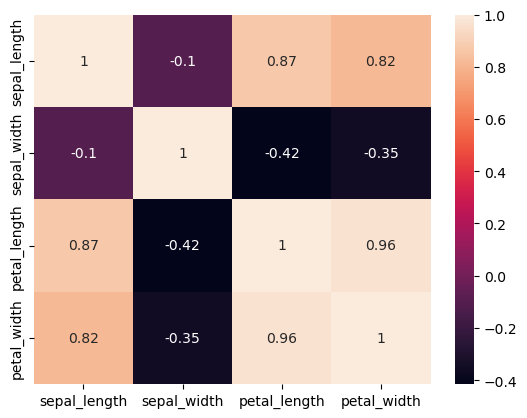

In [19]:
sns.heatmap(corr,annot=True)

In [20]:
# Loading the iris image
import matplotlib.image as img

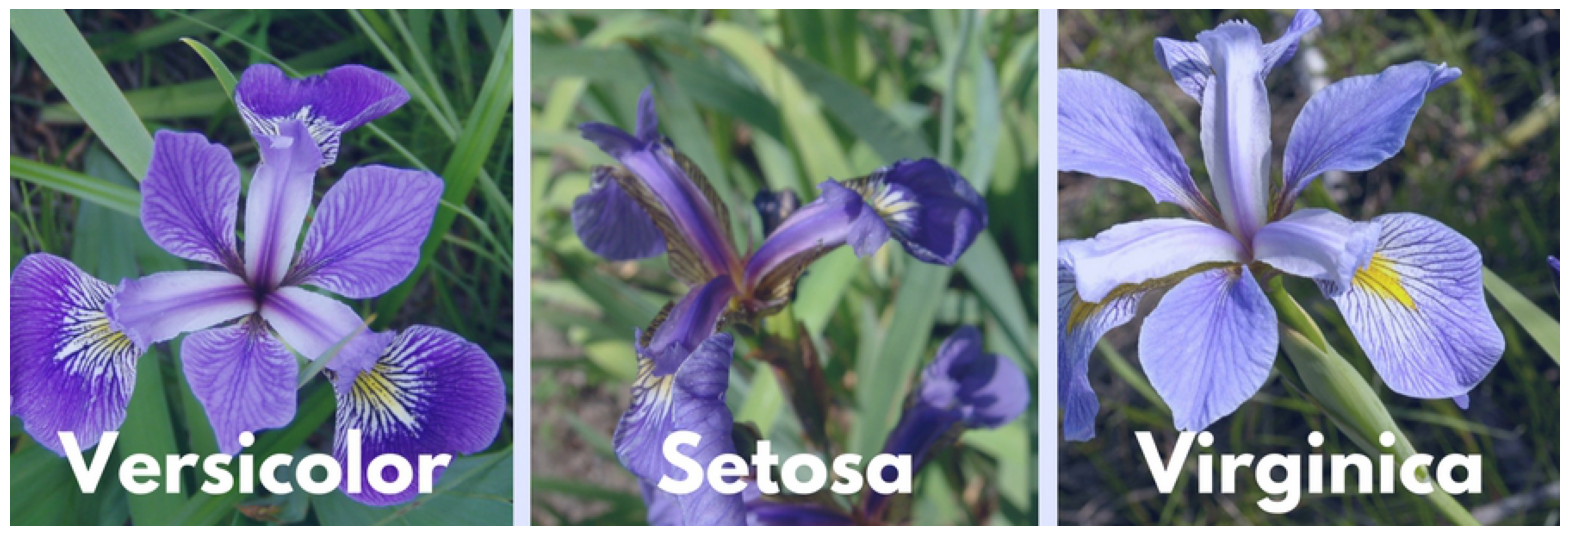

In [21]:
img = img.imread(r'C:\Users\Dell\Downloads\iris_types (1).jpg')
plt.figure(figsize = (20,15))
plt.axis('off')
plt.imshow(img)

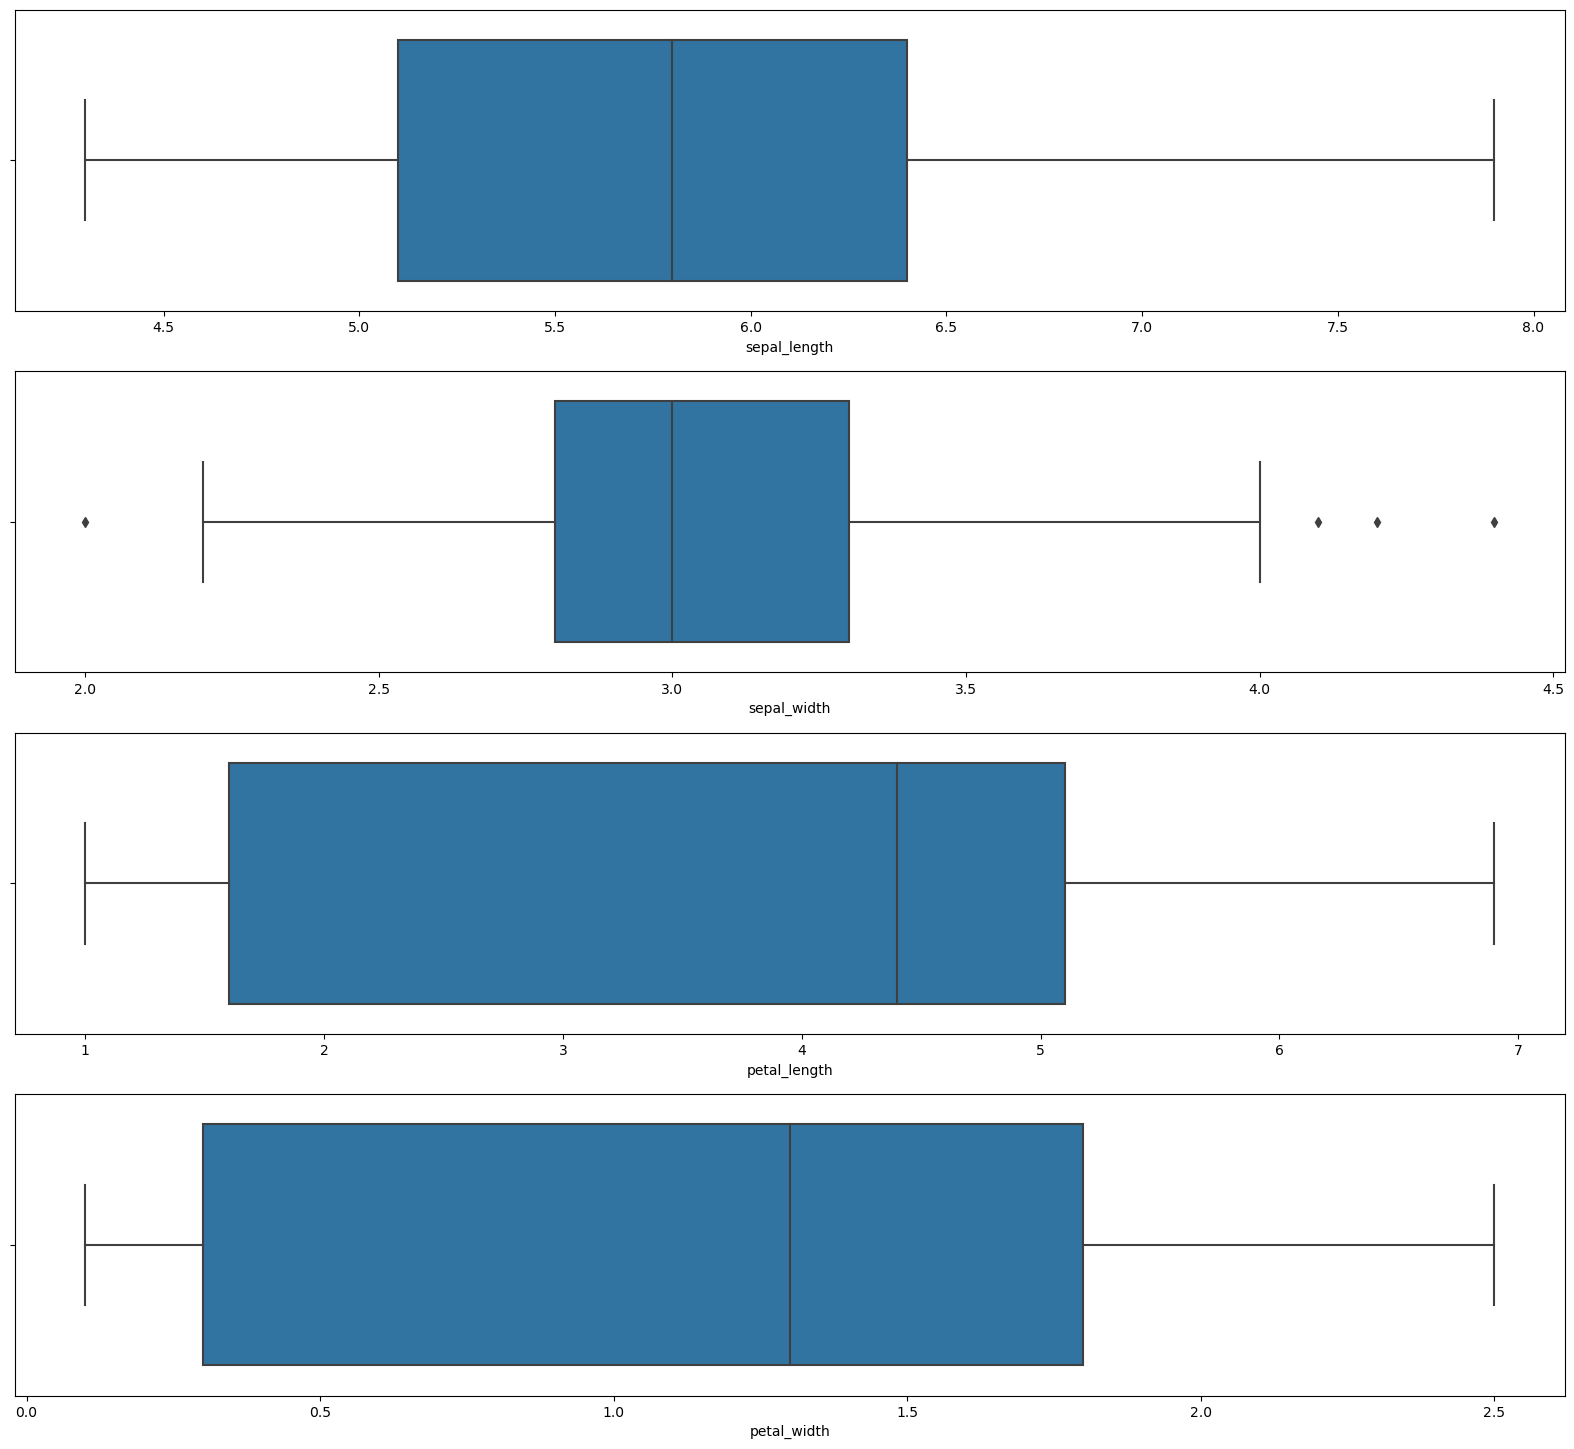

In [22]:
# check the outlier
plt.figure(figsize = (20,18))
for i, cols in enumerate(data.columns[:-1]):
    plt.subplot(4,1,i+1)
    sns.boxplot(x = data[cols])
plt.show()

In [23]:
#  only one has outlier so remove it using clip method
data['sepal_width'] = data['sepal_width'].clip(lower = data['sepal_width'].quantile(0.05), upper = data['sepal_width'].quantile(0.95))

<AxesSubplot:xlabel='sepal_width'>

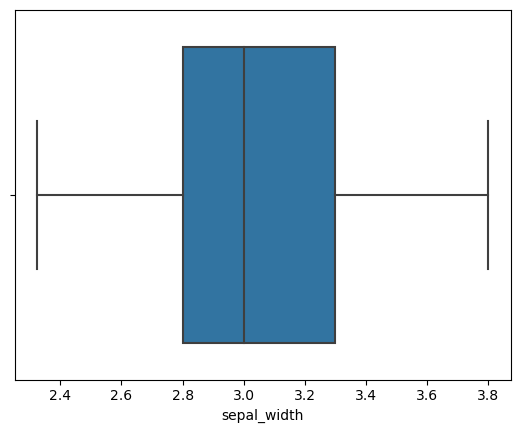

In [24]:
sns.boxplot(data['sepal_width'])

In [25]:
# looking for imbalance dataset
imbalance=data['species'].value_counts()
imbalance

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        47
Name: species, dtype: int64

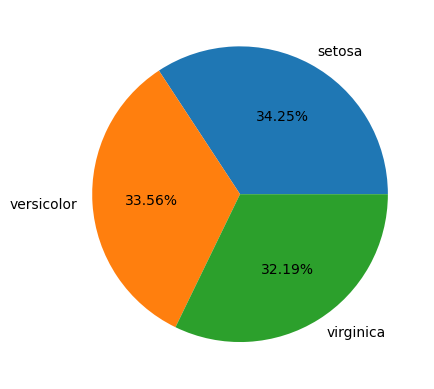

In [26]:
# we use pie plot 
plt.pie(imbalance, data = data, autopct='%.2f%%', labels = ['setosa','versicolor','virginica'])
plt.show()

In [27]:
# scaling the data
from sklearn.preprocessing import StandardScaler

In [28]:
standard=StandardScaler()

In [29]:
# independent variable
x=data.drop('species',axis=1)

In [30]:
# dependent variable
y=data['species']

In [31]:
# balance the dataset
from imblearn.over_sampling import SMOTE

In [32]:
smote=SMOTE(random_state=123)

In [33]:
x=data.drop('species',axis=1)

In [34]:
y=data['species']

In [35]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [36]:
x_final,y_final=smote.fit_resample(x,y)

In [37]:
len(x_final),len(y_final)

(150, 150)

In [38]:
# Now convert tuple to dataframe
c_df=pd.DataFrame(y_final)

<AxesSubplot:xlabel='species', ylabel='count'>

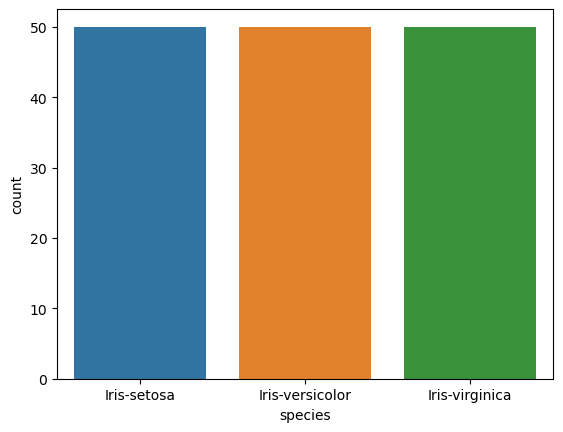

In [39]:
sns.countplot(y_final)

In [40]:
# spliting the data
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [42]:
x_train.shape,x_test.shape

((116, 4), (30, 4))

In [43]:
y_train.shape,y_test.shape

((116,), (30,))

In [44]:
# now scaling the data
x_train=standard.fit_transform(x_train)

In [45]:
x_test=standard.transform(x_test)

In [46]:
x_train

array([[-0.16436677,  1.92057074, -1.668431  , -1.50603971],
       [-0.53579299, -1.11569783,  0.26634434, -0.12936039],
       [ 0.33086818, -1.81150937,  0.32680607,  0.28364341],
       [-0.41198425, -0.86267544,  0.14542088,  0.00830755],
       [ 0.94991187, -0.1036083 ,  0.75003818,  1.38498687],
       [ 2.18799924, -0.1036083 ,  1.29419375,  1.38498687],
       [ 0.45467692, -0.86267544,  0.56865299,  0.69664721],
       [ 0.94991187, -0.1036083 ,  0.62911472,  0.55897928],
       [-0.65960172,  0.90848122, -1.36612236, -1.50603971],
       [-1.77388036, -1.81150937, -1.60796927, -1.36837178],
       [-0.16436677, -0.86267544, -0.0359643 , -0.12936039],
       [-1.40245415,  0.90848122, -1.2451989 , -1.50603971],
       [-0.65960172,  1.66754836, -1.48704582, -1.50603971],
       [-0.65960172, -0.1036083 ,  0.32680607,  0.28364341],
       [ 1.69276429, -0.35663068,  1.41511721,  0.69664721],
       [ 2.18799924,  1.92057074,  1.65696412,  1.24731894],
       [ 0.94991187,  0.

In [47]:
x_test

array([[-1.15483667,  0.65545884, -1.54750755, -1.50603971],
       [ 2.18799924, -0.60965306,  1.65696412,  0.97198308],
       [-1.03102794, -1.36872021, -0.58011987, -0.26702832],
       [-1.52626289,  0.40243646, -1.42658409, -1.50603971],
       [-1.15483667,  0.40243646, -1.668431  , -1.50603971],
       [ 0.57848565, -0.60965306,  0.9918851 ,  1.24731894],
       [ 0.57848565,  0.14941408,  0.93142337,  0.69664721],
       [ 0.94991187,  0.14941408,  0.9918851 ,  1.52265481],
       [-1.40245415, -0.1036083 , -1.54750755, -1.36837178],
       [ 0.0832507 , -1.81150937,  0.62911472,  0.28364341],
       [-1.40245415,  0.14941408, -1.42658409, -1.50603971],
       [-1.03102794,  1.66754836, -1.48704582, -1.23070385],
       [-1.15483667,  1.1615036 , -1.60796927, -1.36837178],
       [ 2.18799924, -1.11569783,  1.77788758,  1.38498687],
       [ 0.45467692, -0.60965306,  0.68957645,  0.28364341],
       [-1.15483667, -0.1036083 , -1.42658409, -1.50603971],
       [-0.65960172,  1.

**MODEL BUILDING**

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
Logistic=LogisticRegression()

In [50]:
Logistic.fit(x_train,y_train)

LogisticRegression()

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
pred=Logistic.predict(x_train)

In [53]:
test_accuracy=accuracy_score(pred,y_train)

In [54]:
test_accuracy

0.9741379310344828

In [55]:
pred=Logistic.predict(x_test)

In [56]:
train_accuracy=accuracy_score(pred,y_test)

In [57]:
train_accuracy

0.9

**using Naive bayes**

In [58]:
# model building
from sklearn.naive_bayes import GaussianNB

In [59]:
gnb = GaussianNB()

In [60]:
gnb.fit(x_train,y_train)

GaussianNB()

In [61]:
pred=gnb.predict(x_test)

In [62]:
pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
      dtype='<U15')

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
acc=accuracy_score(pred,y_test)

In [65]:
acc

0.9

# Conclusion

I mainly worked through the Python documentation manuals of the Pandas, Matplotlib and Seaborn modules as well as the Python 3 documentation. There are many resources freely available for learning how to use Python and applying it to analysing datasets such as the Iris dataset. The pandas library is quite intuitive and in a valuable tool in investigating and analysing multi-class multi-variates datasets such as the Iris dataset.

In the IRIS dataset ,i perform logistic regression and Naive bayes algorithm .